<a href="https://colab.research.google.com/github/tamer017/ML-Assessments/blob/master/Hierarchal_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchal Clustering

Running this project require the following imports 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from scipy.spatial.distance import cdist
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import normaltest, zscore
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from operator import itemgetter
%matplotlib inline

In [ ]:

plt.figure(figsize=(16,8))
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, method = [], num_clusters = 0,kmean = False):
    # color = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan","yellow","black","lime","magenta"]  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
      sns.scatterplot(X[:, 0], X[:, 1], hue=np.zeros((X.shape[0],)), legend='full',palette="Set1")  
    else:
      labels = method.labels_
      if (num_clusters > 45):
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels,palette="Set1").legend_.remove() 
      else: 
        sns.scatterplot(X[:, 0], X[:, 1], hue=labels, legend='auto',palette="Set1")  
        # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,ncol=3)
      if (kmean):
        for i in range(num_clusters):
            plt.scatter(method.cluster_centers_[i][0], method.cluster_centers_[i][1], c = "black", marker = 'x', s = 100)   
    plt.show()
  
          

<Figure size 1152x576 with 0 Axes>

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
def Agglomerative_clustering(X, affinities = ['euclidean', 'manhattan', 'cosine'],linkages = ['average', 'single'],distance_thresholds = [3,5,10,7,9,4],no_dendograms = False):
  # Initialize variables to store best results
  best_silhouette_score = -1
  best_params = {}

  # Loop over all parameter combinations and perform clustering
  for affinity in affinities:
      for linkage_method in linkages:
          for distance_threshold in distance_thresholds:
              # Initialize model with current parameters
              model = AgglomerativeClustering(n_clusters=None, 
                                              affinity=affinity, 
                                              linkage=linkage_method,
                                              distance_threshold=distance_threshold)
              model.fit(X)
              n_clusters = np.unique(model.labels_).shape[0]
             
              if (n_clusters > 1):
                # Calculate the silhouette score
                silhouette_avg = silhouette_score(X, model.labels_)
                print("The number of clusters is :",np.unique(model.labels_).shape[0],"clusters",f"with silhouette score : {silhouette_avg:.2f}")
                print(f"Affinity: {affinity}, Linkage: {linkage_method}, Distance Threshold: {distance_threshold}")
                print(f"Silhouette Score: {silhouette_avg:.2f}")

                # If the current score is better than the previous best score, update the variables
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_params = {'affinity': affinity, 'linkage': linkage_method, 'distance_threshold': distance_threshold,"nuber of clusters" : n_clusters}
                if X.shape[1] == 2:
                  display_cluster(X, method = model, num_clusters = n_clusters)
                # Plot the dendrogram
                if(no_dendograms == False):
                  linkage_matrix = linkage(model.children_, method=linkage_method)
                  plt.figure(figsize=(12, 5))
                  plt.title(f"Dendrogram ({affinity}, {linkage_method})\nSilhouette Score: {silhouette_avg:.2f}")
                  dendrogram(linkage_matrix,)
                  plt.show()
              else:
                print("distance threshold :",distance_threshold,", linkage methode :",linkage_method,", and affinity :",affinity,"produces only one cluster")
      
              print("-----------------------------------------------------------------------------------------------------")

  print(f"\nBest Silhouette Score: {best_silhouette_score:.2f}")
  print(f"Best Parameters: {best_params}")
  return best_silhouette_score, best_params


The number of clusters is : 16 clusters with silhouette score : 0.36
Affinity: euclidean, Linkage: average, Distance Threshold: 3
Silhouette Score: 0.36


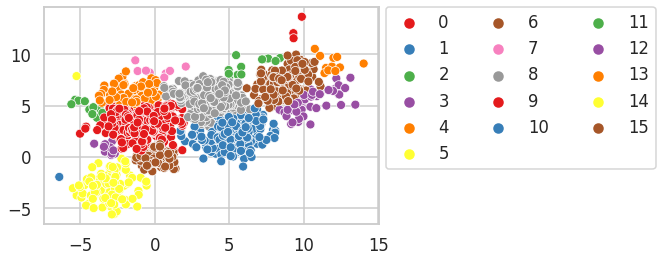

-----------------------------------------------------------------------------------------------------
The number of clusters is : 5 clusters with silhouette score : 0.43
Affinity: euclidean, Linkage: average, Distance Threshold: 5
Silhouette Score: 0.43


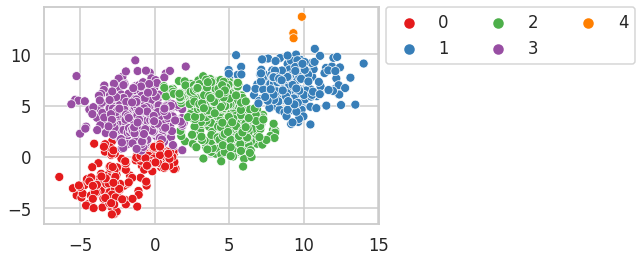

-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.47
Affinity: euclidean, Linkage: average, Distance Threshold: 7
Silhouette Score: 0.47


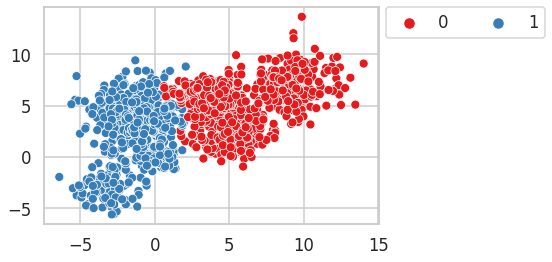

-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 10 clusters with silhouette score : 0.37
Affinity: euclidean, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.37


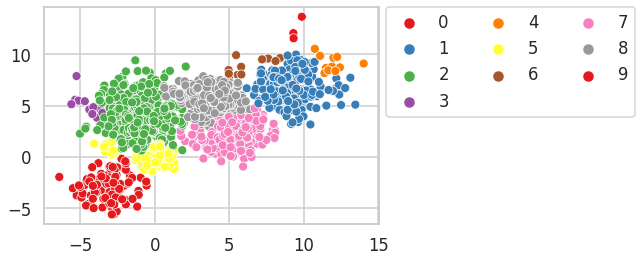

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 7 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : euclidean 

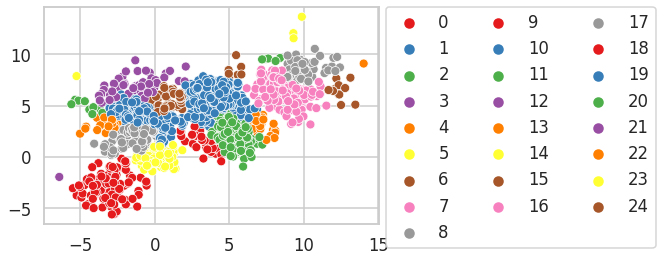

-----------------------------------------------------------------------------------------------------
The number of clusters is : 9 clusters with silhouette score : 0.40
Affinity: manhattan, Linkage: average, Distance Threshold: 5
Silhouette Score: 0.40


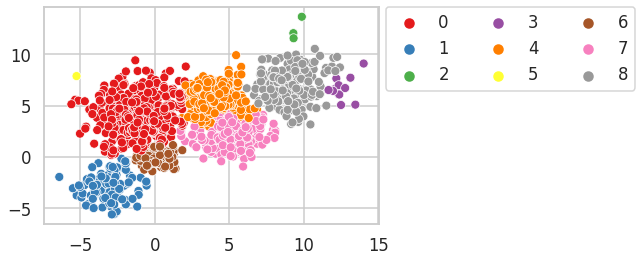

-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.47
Affinity: manhattan, Linkage: average, Distance Threshold: 10
Silhouette Score: 0.47


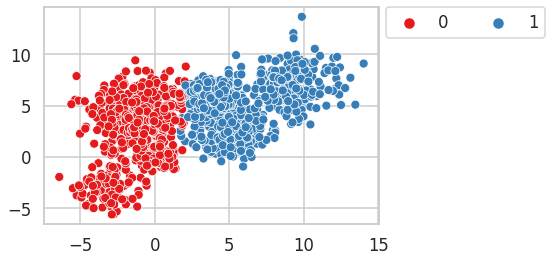

-----------------------------------------------------------------------------------------------------
The number of clusters is : 5 clusters with silhouette score : 0.40
Affinity: manhattan, Linkage: average, Distance Threshold: 7
Silhouette Score: 0.40


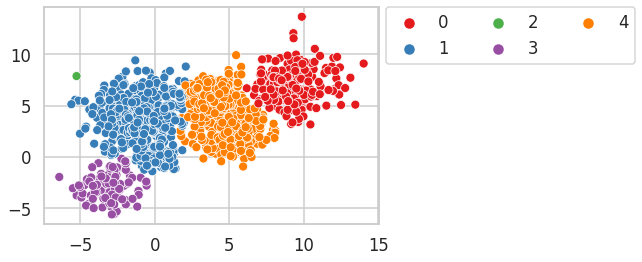

-----------------------------------------------------------------------------------------------------
The number of clusters is : 3 clusters with silhouette score : 0.41
Affinity: manhattan, Linkage: average, Distance Threshold: 9
Silhouette Score: 0.41


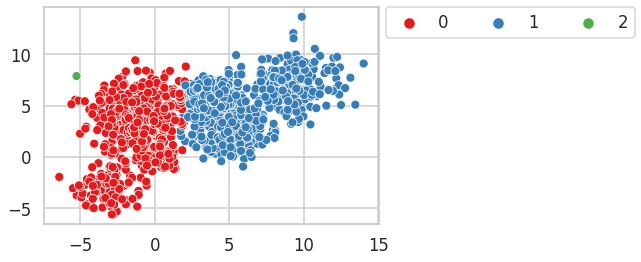

-----------------------------------------------------------------------------------------------------
The number of clusters is : 16 clusters with silhouette score : 0.33
Affinity: manhattan, Linkage: average, Distance Threshold: 4
Silhouette Score: 0.33


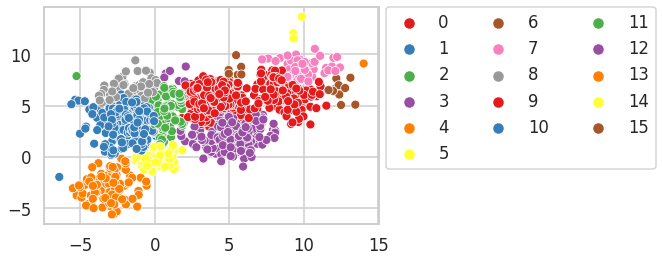

-----------------------------------------------------------------------------------------------------
distance threshold : 3 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 5 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 10 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 7 , linkage methode : single , and affinity : manhattan produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : manhattan 

(0.4716908069861964,
 {'affinity': 'euclidean',
  'linkage': 'average',
  'distance_threshold': 7,
  'nuber of clusters': 2})

In [ ]:
Agglomerative_clustering(X,no_dendograms = True)
# The number of clusters is : 2 clusters with silhouette score : 0.47
# Affinity: manhattan, Linkage: average, Distance Threshold: 10
# Silhouette Score: 0.47

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



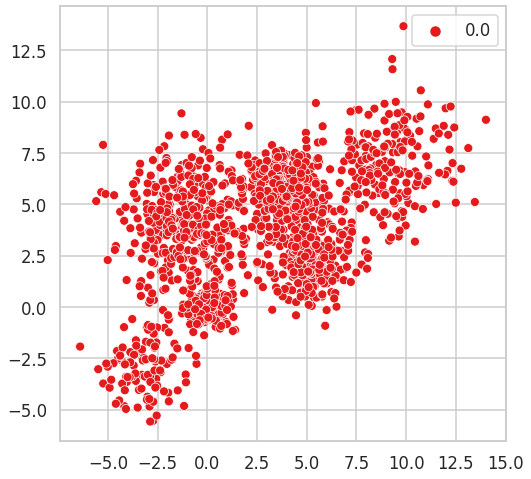

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(iris_data.data)


For 2 clusters, the average silhouette_score is : 0.6810461692117462 , the destortion function is : 0.8555777695266533 ,and inertia is : 152.3479517603579
For 3 clusters, the average silhouette_score is : 0.5528190123564095 , the destortion function is : 0.6480304904934434 ,and inertia is : 78.851441426146
For 4 clusters, the average silhouette_score is : 0.49805050499728737 , the destortion function is : 0.5573847727333312 ,and inertia is : 57.22847321428572
For 5 clusters, the average silhouette_score is : 0.48874888709310566 , the destortion function is : 0.5096521951118286 ,and inertia is : 46.446182051282065
For 6 clusters, the average silhouette_score is : 0.36483400396700255 , the destortion function is : 0.4670733963396438 ,and inertia is : 39.03998724608726
For 7 clusters, the average silhouette_score is : 0.3462460703534074 , the destortion function is : 0.44282551880601356 ,and inertia is : 34.756749639249634
For 8 clusters, the average silhouette_score is : 0.34996644367986

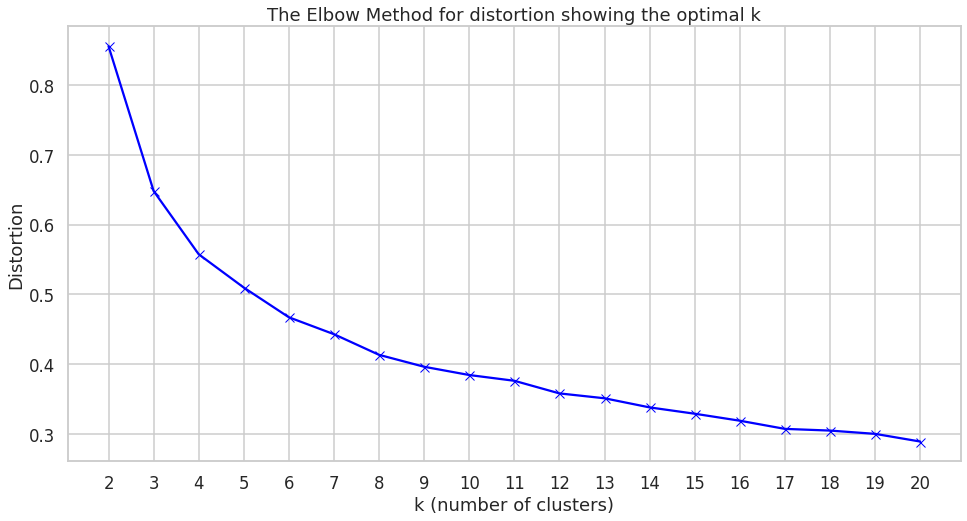

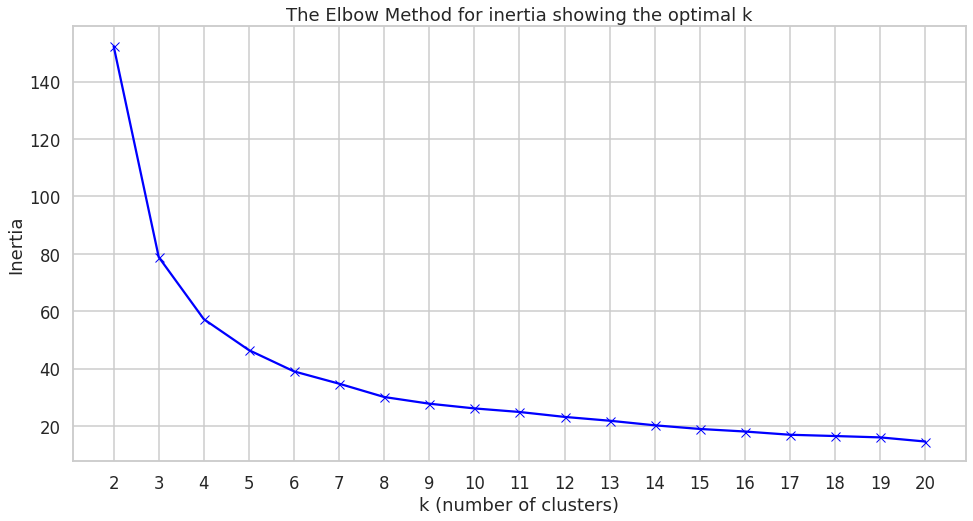

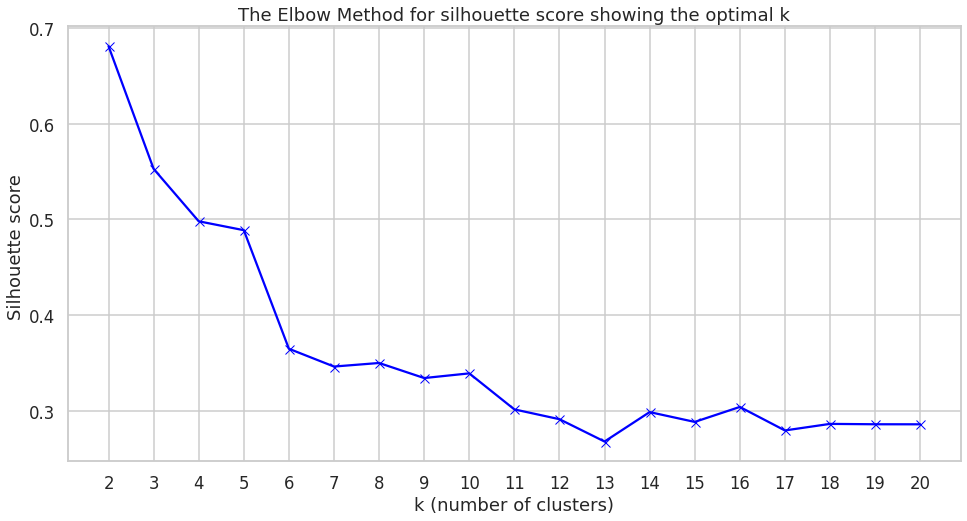

{'n_clusters': 2, 'silhouette_score': 0.6810461692117462}

In [ ]:
K_mean(iris_data.data) # 2

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
df = pd.read_csv("/content/Customer data.csv",index_col = "ID")
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 189.5 KB


In [ ]:
Agglomerative_clustering(scaled_data, linkages = ['average', 'single', 'complete'], distance_thresholds = [9,15], no_dendograms = True)

distance threshold : 9 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 15 , linkage methode : average , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 9 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
distance threshold : 15 , linkage methode : single , and affinity : euclidean produces only one cluster
-----------------------------------------------------------------------------------------------------
The number of clusters is : 2 clusters with silhouette score : 0.13
Affinity: euclidean, Linkage: complete, Distance Threshold: 9
Silhouette Score: 0.13
-----------------------

(0.29632861067054433,
 {'affinity': 'manhattan',
  'linkage': 'complete',
  'distance_threshold': 9,
  'nuber of clusters': 19})

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(iris_data.data)


In [ ]:
sns.pairplot(pd.DataFrame(iris_data.data,columns = iris_data.feature_names), kind="reg")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
dff = pd.DataFrame(transformed,columns = ["1",'2',"3"])
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(dff, x='1', y='2', z='3',
              color='3')
fig.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# prepare transform on dataset
pca.fit(iris_data.data)
# apply transform to dataset
transformed = pca.transform(iris_data.data)
# dff = pd.DataFrame(transformed,columns = ["1",'2',"3"])
# import plotly.express as px
# df = px.data.iris()
# fig = px.scatter_3d(dff, x='1', y='2', z='3',
#               color='3')
# fig.show()

In [ ]:
Agglomerative_clustering(iris_data.data, linkages = ['average', 'single', 'complete'], distance_thresholds = [0.1,0.2], no_dendograms = True)
# The number of clusters is : 2 clusters with silhouette score : 0.69
# Affinity: cosine, Linkage: complete, Distance Threshold: 0.1
# Silhouette Score: 0.69